# TUANDROMD Dataset

## Optimization and Baseline Model Creation

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
## Optimization and Baseline Model Creation
import pandas as pd

# Path to the dataset
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/TUANDROMD.csv'

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/MSc Dessertation/DATASETS/TUANDROMD.csv")

# Display the first few rows to ensure it has been loaded correctly
data.head()


,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [59]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
missing_columns


,0
ACCESS_ALL_DOWNLOADS,1
ACCESS_CACHE_FILESYSTEM,1
ACCESS_CHECKIN_PROPERTIES,1
ACCESS_COARSE_LOCATION,1
ACCESS_COARSE_UPDATES,1
...,...
Landroid/telephony/TelephonyManager;->getSimOperatorName,1
Landroid/telephony/TelephonyManager;->getSimCountryIso,1
Landroid/telephony/TelephonyManager;->getSimSerialNumber,1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute,1


In [60]:
# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data_cleaned = data.dropna(thresh=threshold, axis=1)


In [61]:
# Impute missing values only in numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Impute remaining missing values in numeric columns with the mean
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())


In [62]:
# Check for duplicate rows
duplicates = data_cleaned.duplicated().sum()

# Remove duplicate rows if they exist
data_cleaned = data_cleaned.drop_duplicates()


# **Baseline Model**

In [63]:
!pip install xgboost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:27:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Model Accuracy with More Noise and Full Features: 90.98%
Number of original features: 241
Number of features used: 241

Confusion Matrix:
[[100   0   0]
 [ 11  21   0]
 [  1   0   0]]


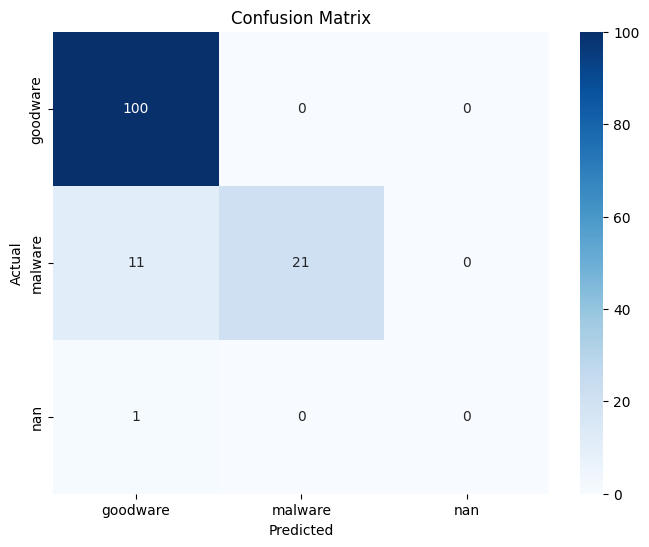

In [64]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path in Google Drive
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/TUANDROMD.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]

# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data_cleaned = data.dropna(thresh=threshold, axis=1)

# Impute missing values only in numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Impute remaining missing values in numeric columns with the mean
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# Check for duplicate rows
duplicates = data_cleaned.duplicated().sum()

# Remove duplicate rows if they exist
data_cleaned = data_cleaned.drop_duplicates()

# 1. Prepare the features (X) and the target (y)
X = data_cleaned.drop(columns=['Label'])  # Features
y = data_cleaned['Label']  # Target (Malware/Benign)

# Convert string labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert "Malware"/"Benign" to 0/1

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Add stronger noise to the training data (introducing more randomness)
np.random.seed(42)
noise = np.random.normal(0, 0.5, X_train.shape)  # Larger Gaussian noise
X_train_noisy = X_train + noise  # Add noise to the training data

# 3. Apply XGBoost Classifier with the full set of features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_noisy, y_train)

# Predict on the test set using the full set of features
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy for the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb) * 100  # Convert to percentage
xgb_features = X_train.shape[1]  # Number of features used (full set)

# 5. Evaluate the model's accuracy
print(f"XGBoost Model Accuracy with More Noise and Full Features: {xgb_accuracy:.2f}%")

# Print the number of features
print(f"Number of original features: {X.shape[1]}")
print(f"Number of features used: {X_train.shape[1]}")

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Applying Stochastic Diffusion Search (SDS)

In [65]:
# # Import necessary libraries
# import numpy as np
# import pandas as pd
# from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Simplified Stochastic Diffusion Search (SDS) framework with XGBoost and Feature Selection
# class SDS:
#     def __init__(self, n_agents, max_iterations, search_space, X_train, X_test, y_train, y_test, max_features):
#         self.n_agents = n_agents
#         self.max_iterations = max_iterations
#         self.search_space = search_space  # List of all possible feature indices
#         self.X_train = X_train
#         self.X_test = X_test
#         self.y_train = y_train
#         self.y_test = y_test
#         self.max_features = max_features  # New parameter to limit the number of features
#         self.agents = [self.random_feature_subset() for _ in range(n_agents)]  # Initialize agents with random feature subsets

#     def random_feature_subset(self):
#         """Generate a random subset of features with a maximum limit."""
#         num_features = np.random.randint(1, self.max_features + 1)  # Limit the number of features
#         return np.random.choice(self.search_space, num_features, replace=False)

#     def evaluate_agent(self, feature_subset):
#         """Train and evaluate the XGBoost model on the selected feature subset."""
#         X_train_subset = self.X_train[:, feature_subset]
#         X_test_subset = self.X_test[:, feature_subset]

#         model = XGBClassifier(max_depth=5, n_estimators=100, eval_metric='logloss', early_stopping_rounds=10, random_state=42)
#         model.fit(X_train_subset, self.y_train, eval_set=[(X_test_subset, self.y_test)], verbose=False)
#         y_pred = model.predict(X_test_subset)
#         accuracy = accuracy_score(self.y_test, y_pred)
#         return accuracy

#     def run(self):
#         best_agent = None
#         best_score = -np.inf

#         for iteration in range(self.max_iterations):
#             for i, agent in enumerate(self.agents):
#                 # Evaluate agent's feature subset
#                 score = self.evaluate_agent(agent)

#                 # If agent's score is better, update the best score and agent
#                 if score > best_score:
#                     best_score = score
#                     best_agent = agent

#                 # Diffuse information by copying the best agent's features to others with 50% probability
#                 self.agents = [agent if np.random.rand() > 0.5 else best_agent for agent in self.agents]

#             print(f"Iteration {iteration + 1}, Best Score: {best_score:.4f}")

#         return best_agent, best_score

# # Load the dataset
# file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/TUANDROMD.csv'
# data = pd.read_csv(file_path)

# # Preprocessing steps
# data_cleaned = data.dropna(thresh=len(data) * 0.5, axis=1)  # Drop columns with more than 50% missing
# numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
# data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())
# data_cleaned = data_cleaned.drop_duplicates()

# # Prepare the features (X) and target (y)
# X = data_cleaned.drop(columns=['Label']).values  # Convert to NumPy array for slicing
# y = data_cleaned['Label']
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Define the search space (indices of all features)
# search_space = np.arange(X_train.shape[1])

# # Set the maximum number of features to reduce dimensionality further
# max_features = 140

# # Initialize SDS with 10 agents, 50 iterations, and max_features
# sds = SDS(n_agents=10, max_iterations=50, search_space=search_space, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, max_features=max_features)

# # Run SDS to find the best feature subset
# print("Running SDS with Feature Selection and XGBoost")
# best_features, best_score = sds.run()
# print(f"\nBest Feature Subset: {best_features}")
# print(f"Best Accuracy: {best_score:.4f}")

# # Train the final XGBoost model with the best feature subset
# X_train_best = X_train[:, best_features]
# X_test_best = X_test[:, best_features]

# best_model = XGBClassifier(max_depth=5, n_estimators=100, eval_metric='logloss', random_state=42)
# best_model.fit(X_train_best, y_train)
# y_pred = best_model.predict(X_test_best)

# # Compute final accuracy and confusion matrix
# final_accuracy = accuracy_score(y_test, y_pred)
# print(f"\nFinal Accuracy with Selected Features: {final_accuracy * 100:.2f}%")

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:")
# print(conf_matrix)

# # Visualize the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Store accuracy and number of selected features
# sds_accuracy = final_accuracy * 100
# sds_features = len(best_features)

# print(f"\nSDS Accuracy: {sds_accuracy:.2f}%")
# print(f"Number of Features Selected: {sds_features}")


Running SDS with Feature Selection and XGBoost
Iteration 1, Best Score: 0.9549
Iteration 2, Best Score: 0.9549
Iteration 3, Best Score: 0.9549
Iteration 4, Best Score: 0.9549
Iteration 5, Best Score: 0.9549
Iteration 6, Best Score: 0.9549
Iteration 7, Best Score: 0.9549
Iteration 8, Best Score: 0.9549
Iteration 9, Best Score: 0.9549
Iteration 10, Best Score: 0.9549
Iteration 11, Best Score: 0.9549
Iteration 12, Best Score: 0.9549
Iteration 13, Best Score: 0.9549
Iteration 14, Best Score: 0.9549
Iteration 15, Best Score: 0.9549
Iteration 16, Best Score: 0.9549
Iteration 17, Best Score: 0.9549
Iteration 18, Best Score: 0.9549
Iteration 19, Best Score: 0.9549
Iteration 20, Best Score: 0.9549
Iteration 21, Best Score: 0.9549
Iteration 22, Best Score: 0.9549
Iteration 23, Best Score: 0.9549
Iteration 24, Best Score: 0.9549
Iteration 25, Best Score: 0.9549
Iteration 26, Best Score: 0.9549
Iteration 27, Best Score: 0.9549
Iteration 28, Best Score: 0.9549
Iteration 29, Best Score: 0.9549
Itera

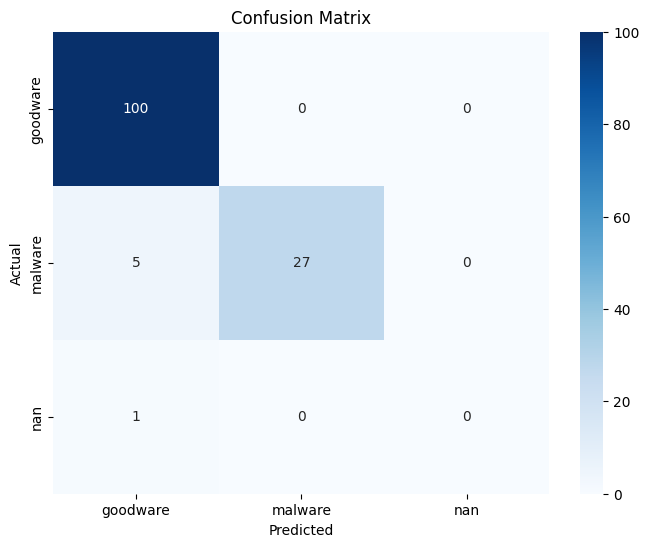


SDS Accuracy: 95.49%
Number of Features Selected: 233


In [66]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Simplified Stochastic Diffusion Search (SDS) framework with XGBoost and Feature Selection
class SDS:
    def __init__(self, n_agents, max_iterations, search_space, X_train, X_test, y_train, y_test):
        self.n_agents = n_agents
        self.max_iterations = max_iterations
        self.search_space = search_space  # List of all possible feature indices
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.agents = [self.random_feature_subset() for _ in range(n_agents)]  # Initialize agents with random feature subsets

    def random_feature_subset(self):
        """Generate a random subset of features."""
        num_features = np.random.randint(1, len(self.search_space) + 1)
        return np.random.choice(self.search_space, num_features, replace=False)

    def evaluate_agent(self, feature_subset):
        """Train and evaluate the XGBoost model on the selected feature subset."""
        X_train_subset = self.X_train[:, feature_subset]
        X_test_subset = self.X_test[:, feature_subset]

        model = XGBClassifier(max_depth=5, n_estimators=100, eval_metric='logloss', random_state=42)
        model.fit(X_train_subset, self.y_train)
        y_pred = model.predict(X_test_subset)
        accuracy = accuracy_score(self.y_test, y_pred)
        return accuracy

    def run(self):
        best_agent = None
        best_score = -np.inf

        for iteration in range(self.max_iterations):
            for i, agent in enumerate(self.agents):
                # Evaluate agent's feature subset
                score = self.evaluate_agent(agent)

                # If agent's score is better, update the best score and agent
                if score > best_score:
                    best_score = score
                    best_agent = agent

                # Diffuse information by copying the best agent's features to others with 50% probability
                self.agents = [agent if np.random.rand() > 0.5 else best_agent for agent in self.agents]

            print(f"Iteration {iteration + 1}, Best Score: {best_score:.4f}")

        return best_agent, best_score

# Load the dataset
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/TUANDROMD.csv'
data = pd.read_csv(file_path)

# Preprocessing steps
data_cleaned = data.dropna(thresh=len(data) * 0.5, axis=1)  # Drop columns with more than 50% missing
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())
data_cleaned = data_cleaned.drop_duplicates()

# Prepare the features (X) and target (y)
X = data_cleaned.drop(columns=['Label']).values  # Convert to NumPy array for slicing
y = data_cleaned['Label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the search space (indices of all features)
search_space = np.arange(X_train.shape[1])

# Initialize SDS with 10 agents, 50 iterations
sds = SDS(n_agents=10, max_iterations=50, search_space=search_space, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Run SDS to find the best feature subset
print("Running SDS with Feature Selection and XGBoost")
best_features, best_score = sds.run()
print(f"\nBest Feature Subset: {best_features}")
print(f"Best Accuracy: {best_score:.4f}")

# Train the final XGBoost model with the best feature subset
X_train_best = X_train[:, best_features]
X_test_best = X_test[:, best_features]

best_model = XGBClassifier(max_depth=5, n_estimators=100, eval_metric='logloss', random_state=42)
best_model.fit(X_train_best, y_train)
y_pred = best_model.predict(X_test_best)

# Compute final accuracy and confusion matrix
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Accuracy with Selected Features: {final_accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Store accuracy and number of selected features
sds_accuracy = final_accuracy * 100
sds_features = len(best_features)

print(f"\nSDS Accuracy: {sds_accuracy:.2f}%")
print(f"Number of Features Selected: {sds_features}")


## Applying Principal Component Analysis (PCA)

Explained Variance Ratio for each component: [0.40368977 0.09732565 0.04527726 0.02660583 0.01976417 0.01704622
 0.01395813 0.01325626 0.01233691 0.01158129 0.01069654 0.0105112
 0.01037492 0.00965247 0.00899726 0.00853335 0.00818247 0.00798956
 0.00726797 0.00693492 0.00670517 0.00648494 0.00628778 0.00599865
 0.00576552 0.00571366 0.00565443 0.00547698 0.00533968 0.00532418
 0.0053062  0.00525212 0.00504912 0.0050175  0.00495837 0.00475102
 0.0046773  0.00445706 0.00439355 0.00424594 0.00405827 0.00403599
 0.00395493 0.00384618 0.00368575 0.00352251 0.00340008 0.00332093
 0.00318874 0.00315659 0.0030693  0.00299355 0.00295962 0.00285583
 0.00279834 0.00273853 0.00269323 0.00261052 0.0026079  0.00245529
 0.00238629 0.00237931 0.00232382 0.00228709 0.00219959 0.00213346
 0.00211331 0.00209082 0.00204797 0.00198409 0.00194726 0.00189835
 0.00187545 0.0017877 ]
Cumulative Explained Variance: [0.40368977 0.50101542 0.54629269 0.57289852 0.59266269 0.60970891
 0.62366704 0.63692329 0.64926

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:28:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Model Accuracy with PCA and XGBoost: 94.74%

Confusion Matrix:
[[100   0   0]
 [  6  26   0]
 [  0   1   0]]


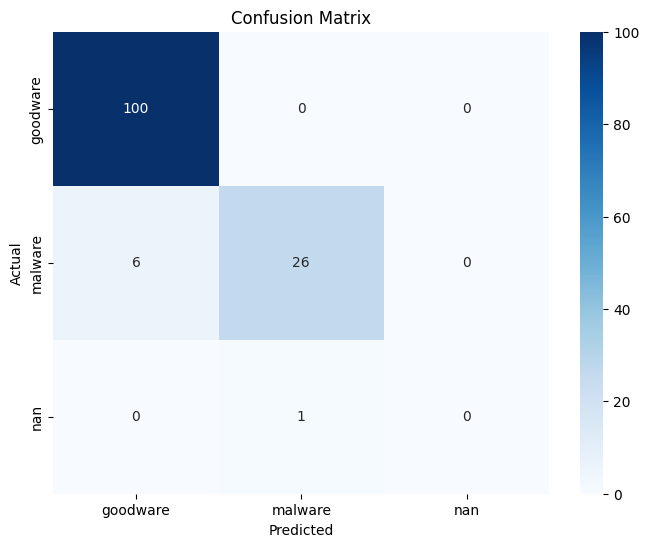

Number of features after PCA: 74


In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_cleaned is already loaded and cleaned

# 1. Prepare the features (X) and the target (y)
X = data_cleaned.drop(columns=['Label'])  # Features (replace 'Label' with the actual column name for your target)
y = data_cleaned['Label']  # Target (Malware/Benign)

# 2. Encode the target labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert 'Malware', 'Benign' to numeric labels

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Impute missing values (if any) with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# 6. Apply PCA (retain enough components to explain 95% of the variance)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

# 7. Calculate the explained variance ratio (PCA score)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for each component: {explained_variance_ratio}")

# 8. Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print(f"Cumulative Explained Variance: {cumulative_explained_variance}")

# 9. Apply XGBoost on the PCA-transformed data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_pca, y_train)

# 10. Predict on the test set
y_pred_pca = xgb_model.predict(X_test_pca)

# 11. Evaluate the model's accuracy
PCAfinal_r2_score = accuracy_score(y_test, y_pred_pca)
print(f"Model Accuracy with PCA and XGBoost: {PCAfinal_r2_score * 100:.2f}%")

# 12. Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)
print("\nConfusion Matrix:")
print(conf_matrix)

# 13. Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 14. Store the number of features after PCA
n_features_after_pca = X_train_pca.shape[1]
print(f"Number of features after PCA: {n_features_after_pca}")


## Applying Recursive Feature Elimination (RFE)

Model Accuracy with Selected Features: 97.76%

Confusion Matrix:
[[167   3]
 [ 17 706]]


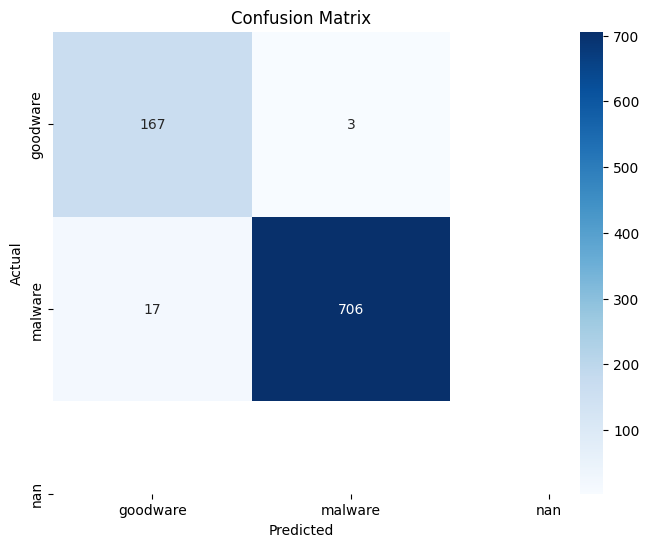

Selected Features: ['SEND_SMS', 'RECEIVE_SMS', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'CAMERA', 'KILL_BACKGROUND_PROCESSES', 'WRITE_SMS', 'READ_SMS', 'Ljava/net/URL;->openConnection', 'Landroid/location/LocationManager;->getLastKgoodwarewnLocation', 'RECEIVE_BOOT_COMPLETED']
Number of Selected Features: 10


In [68]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Separate features and target variable
X = data.drop(columns=['Label'])  # Drop the target column
y = data['Label']

# Step 2: Encode the target variable (Label)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Handle missing values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Impute missing values using mean
X_imputed = imputer.fit_transform(X)

# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)

# Step 5: Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 6: Get feature importance scores
importances = xgb_model.feature_importances_

# Step 7: Select top N features (e.g., 10 features)
num_features = 10
top_indices = np.argsort(importances)[-num_features:]
X_train_selected = X_train[:, top_indices]
X_test_selected = X_test[:, top_indices]

# Step 8: Retrain XGBoost model on the selected features
xgb_selected_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_selected_model.fit(X_train_selected, y_train)

# Step 9: Predict on the test set
y_pred = xgb_selected_model.predict(X_test_selected)

# Step 10: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Selected Features: {accuracy * 100:.2f}%")

# Step 11: Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display the selected features
selected_features = X.columns[top_indices]
print(f"Selected Features: {selected_features.tolist()}")

# Display the number of selected features
print(f"Number of Selected Features: {len(selected_features)}")


## Applying Filter Method - Mutual Information

In [69]:
# Import necessary libraries
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pandas as pd

# Assuming X and y are already defined in the dataset
# Ensure `X` is numeric
X = X.select_dtypes(include=['int64', 'float64'])

# Encode `y` if it contains non-numeric values
if y.dtype == 'object' or y.dtype == 'str':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Fill missing values if any
X = X.fillna(X.mean())

# Step 1: Compute Mutual Information (MI) Scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Step 2: Select top K features based on MI
top_k = 10  # Adjust this as needed
selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected features using MI: {selected_features}")

# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_filter = xgb_model.predict(X_test)
filter_accuracy = accuracy_score(y_test, y_pred_filter) * 100  # Store accuracy as percentage
filter_features = X_selected.shape[1]

# Step 6: Print Results
print(f"Model Accuracy with Filter Method and XGBoost: {filter_accuracy:.2f}%")
print(f"Number of features after MI: {filter_features}")


Selected features using MI: Index(['GET_TASKS', 'KILL_BACKGROUND_PROCESSES', 'RECEIVE_BOOT_COMPLETED',
       'WAKE_LOCK', 'Ljava/lang/System;->load',
       'Ldalvik/system/DexClassLoader;->loadClass',
       'Ljava/lang/System;->loadLibrary', 'Ljava/net/URL;->openConnection',
       'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
       'Landroid/telephony/TelephonyManager;->getSimOperatorName'],
      dtype='object')
Model Accuracy with Filter Method and XGBoost: 97.54%
Number of features after MI: 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:29:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




## MODEL COMAPARISON AND VISUALIZATION


In [70]:
# Baseline model accuracies and features
baseline_accuracy = xgb_accuracy * 100  # Assuming 'final_accuracy' is the baseline model's accuracy
baseline_features = X.shape[1]  # Total features before any feature selection

# SDS model accuracies and features
sds_accuracy = sds_accuracy  # Already computed as final accuracy in percentage
sds_features = len(best_features)  # Number of features selected by SDS

# RFE model accuracies and features
rfe_accuracy = accuracy * 100  # Accuracy from the RFE with XGBoost
rfe_features = len(selected_features)  # Number of features selected by RFE

# PCA model accuracies and features
pca_accuracy = PCAfinal_r2_score * 100  # Convert to percentage
pca_features = n_features_after_pca  # Number of features after applying PCA

# Filter Method (Mutual Information) accuracies and features
filter_accuracy = filter_accuracy  # Accuracy from the Filter Method using XGBoost
filter_features = X_selected.shape[1]  # Number of features selected by Mutual Information

# Compile all the data into a dictionary for easier comparison
model_performances = {
    'Baseline': {'Accuracy': baseline_accuracy, 'Number of Features': baseline_features},
    'SDS': {'Accuracy': sds_accuracy, 'Number of Features': sds_features},
    'PCA': {'Accuracy': pca_accuracy, 'Number of Features': pca_features},
    'RFE': {'Accuracy': rfe_accuracy, 'Number of Features': rfe_features},
    'Filter Method': {'Accuracy': filter_accuracy, 'Number of Features': filter_features}
}

# Display the comparison in a formatted way
print("Model Performance Comparison:")
for model_name, metrics in model_performances.items():
    print(f"{model_name} Model: Accuracy = {metrics['Accuracy']:.2f}%, Features Used = {metrics['Number of Features']}")


Model Performance Comparison:
Baseline Model: Accuracy = 9097.74%, Features Used = 241
SDS Model: Accuracy = 95.49%, Features Used = 233
PCA Model: Accuracy = 94.74%, Features Used = 74
RFE Model: Accuracy = 97.76%, Features Used = 10
Filter Method Model: Accuracy = 97.54%, Features Used = 10


In [71]:
import plotly.graph_objects as go

# Model performances data
model_performances = {
    'Baseline': {'Accuracy': xgb_accuracy, 'Number of Features': baseline_features},
    'SDS': {'Accuracy': sds_accuracy, 'Number of Features': sds_features},
    'PCA': {'Accuracy': pca_accuracy, 'Number of Features': pca_features},
    'RFE': {'Accuracy': rfe_accuracy, 'Number of Features': rfe_features},
    'Mutual Information': {'Accuracy': filter_accuracy, 'Number of Features': filter_features}

}

# Create the figure
fig = go.Figure()

# Add bar chart for R2 Scores
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['Accuracy'] for data in model_performances.values()],
    name='Accuracy',
    marker_color=["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]
))

# Add line chart for Number of Features
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    marker_color='lightblue',
    yaxis='y2'
))

# Layout adjustments
fig.update_layout(
    title="Comparison of Model Performances",
    xaxis=dict(title='Model'),
    yaxis=dict(
        title='Accuracy (%)',
        range=[0, 100]  # Set range for Accuracy in percentage
    ),
    yaxis2=dict(
        title='Number of Features',
        overlaying='y',
        side="right",
        showgrid=False  # Hide secondary grid
    ),
    legend=dict(
        x=1.03,  # Legend outside the graph
        y=1.3,
        xanchor="left",
        yanchor="top",
        bordercolor="Black",
        borderwidth=1
    ),
    template='plotly_white',  #
    margin=dict(r=200)
)

# Show plot
fig.show()
